# OLA 1
## By group H (Caroline, Michael & Maria) 

## Task 1: Data Exploration and Cleaning

##### Task 1.1 
We have chosen to work with a dataset of the top 1000 ranked channels on YouTube based on subscriber count.

##### Task 1.2

In [19]:
import pandas as pd

In [2]:
data = pd.read_csv("Youtuber.csv")
df = pd.DataFrame(data)
df.describe()

,Rank
count,1045.000000
mean,521.055502
std,298.709262
min,1.000000
25%,262.000000
50%,523.000000
75%,784.000000
max,1000.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              1045 non-null   float64
 1   Channel Name      1045 non-null   object 
 2   Category          695 non-null    object 
 3   Subscribers       1045 non-null   object 
 4   Country           853 non-null    object 
 5   Average Views     1045 non-null   object 
 6   Average Likes     1045 non-null   object 
 7   Average Comments  1045 non-null   object 
 8   Content Type      335 non-null    object 
dtypes: float64(1), object(8)
memory usage: 73.7+ KB


In [4]:
data.head()

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223,NaN
2,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K,Humor
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,NaN,5.1M,57.1K,0,NaN
4,4.0,SET India,NaN,167.1M,India,27.9K,996,7,NaN


In our dataset the first column has been left empty for styling purposes, therefore we have chosen to remove that column here.

In [5]:
df = df.drop([0])

##### Task 1.3

In [6]:
#Identify columns with missing values
null_mask = df.isnull().any(axis=1)
rows_with_null_any = df[null_mask]
rows_with_null_any

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223,NaN
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,NaN,5.1M,57.1K,0,NaN
4,4.0,SET India,NaN,167.1M,India,27.9K,996,7,NaN
5,5.0,✿ Kids Diana Show,Animation,118.5M,NaN,5.1M,14.3K,0,Toys
6,6.0,Like Nastya,Toys,112.6M,NaN,3.4M,45.9K,0,NaN
...,...,...,...,...,...,...,...,...,...
1040,995.0,Little Baby Bum en Español,NaN,12.6M,NaN,21K,45,0,NaN
1041,996.0,BBC Earth,NaN,12.5M,United States,80.3K,1.7K,79,NaN
1043,998.0,janin al chair,NaN,12.5M,Mexico,1.4M,146.1K,485,NaN
1044,999.0,Myke Towers,Music & Dance,12.5M,Colombia,8.3K,485,8,NaN


In [7]:
null_counts = {}
for column in df.columns:
    null_counts[column] = df[column].isnull().sum()

null_counts

{'Rank': 0,
 'Channel Name': 0,
 'Category': 350,
 'Subscribers': 0,
 'Country': 192,
 'Average Views': 0,
 'Average Likes': 0,
 'Average Comments': 0,
 'Content Type': 710}

The columns ‘Category’ and ‘Content Type’ are the columns that are missing the most values. We want to know what type of values are in the two columns, since we have observed that some values overlap. We have chosen to drop the ‘Content Type’ column, since it has 67.7 % missing values. 
Before dropping the column however, we want to see if we can add some missing values to the ‘Category’ column. We want to see if there exists any rows in which the ‘Category’ column is missing a value, while there is a value in the ‘Content Type’ column. This is not the case.


In [8]:
df["Content Type"].unique()

array([nan, 'Humor', 'Toys', 'Video games', 'Animation', 'Movies',
       'Health & Self Help', 'Fashion', 'Autos & Vehicles', 'Beauty',
       'Food & Drinks'], dtype=object)

In [9]:
df["Category"].unique()

array(['Music & Dance', 'Video games', 'Education', nan, 'Animation',
       'Toys', 'Movies', 'News & Politics', 'Daily vlogs', 'Travel',
       'Fitness', 'Beauty', 'Humor', 'Food & Drinks', 'Design/art',
       'Sports', 'Science & Technology', 'Health & Self Help',
       'DIY & Life Hacks', 'ASMR', 'Autos & Vehicles', 'Animals & Pets',
       'Fashion', 'Mystery'], dtype=object)

In [10]:
condition = df['Category'].isnull() & df['Content Type'].notnull()
filtered_df = df[condition]
filtered_df

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type


We found duplicates for the last 45 values, so instead of there being 1000 youtubers, there were 1045. Then we found which rows were duplicated, which were some youtubers ranked from 952 to 1000. Since we didn’t want redundant data, we removed the duplicates. 


In [11]:
duplicated_rows = df[df.duplicated(subset='Rank', keep=False)]
duplicated_rows

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
952,952.0,Timba Vk,Animation,12.8M,Mexico,1.3M,29.5K,703,Video games
954,954.0,Heidi and Zidane Kids Fun,Animation,12.8M,NaN,61.5K,1K,0,Toys
958,958.0,#Refúgio Mental,Movies,12.8M,Brazil,266.4K,4.7K,96,Animation
959,959.0,Ellie Goulding,Music & Dance,12.8M,United States,39.4K,2.1K,162,NaN
960,960.0,YoSoyPlex,Movies,12.8M,Spain,2.1M,120.6K,5.9K,Video games
...,...,...,...,...,...,...,...,...,...
1041,996.0,BBC Earth,NaN,12.5M,United States,80.3K,1.7K,79,NaN
1042,997.0,Jamie Nyland,Animation,12.5M,United States,66.7K,2.5K,104,Humor
1043,998.0,janin al chair,NaN,12.5M,Mexico,1.4M,146.1K,485,NaN
1044,999.0,Myke Towers,Music & Dance,12.5M,Colombia,8.3K,485,8,NaN


In [12]:
duplicated_rows = df.loc[df.duplicated(subset='Rank', keep=False),'Rank'].unique()
duplicated_rows

array([ 952.,  954.,  958.,  959.,  960.,  961.,  962.,  963.,  964.,
        965.,  966.,  967.,  968.,  969.,  970.,  971.,  972.,  973.,
        974.,  975.,  976.,  977.,  978.,  979.,  980.,  981.,  982.,
        983.,  984.,  985.,  986.,  987.,  988.,  989.,  990.,  991.,
        992.,  993.,  994.,  995.,  996.,  997.,  998.,  999., 1000.])

In [13]:
df_unique = df.drop_duplicates(subset='Rank', keep='first')
df_unique

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223,NaN
2,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K,Humor
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,NaN,5.1M,57.1K,0,NaN
4,4.0,SET India,NaN,167.1M,India,27.9K,996,7,NaN
5,5.0,✿ Kids Diana Show,Animation,118.5M,NaN,5.1M,14.3K,0,Toys
...,...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,NaN,12.5M,United States,80.3K,1.7K,79,NaN
997,997.0,Jamie Nyland,Animation,12.5M,United States,66.7K,2.5K,104,Humor
998,998.0,janin al chair,NaN,12.5M,Mexico,1.4M,146.1K,485,NaN
999,999.0,Myke Towers,Music & Dance,12.5M,Colombia,8.3K,485,8,NaN


We redid the unique counting since we removed duplicates, to know how many missing values there actually were in 'Content Type' 

In [14]:
null_counts_unique = {}
for column in df_unique.columns:
    null_counts_unique[column] = df_unique[column].isnull().sum()

null_counts_unique

{'Rank': 0,
 'Channel Name': 0,
 'Category': 335,
 'Subscribers': 0,
 'Country': 183,
 'Average Views': 0,
 'Average Likes': 0,
 'Average Comments': 0,
 'Content Type': 677}

We then dropped the column 'Content Type'

In [15]:
df_clean = df_unique.drop('Content Type', axis=1)
df_clean

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223
2,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,NaN,5.1M,57.1K,0
4,4.0,SET India,NaN,167.1M,India,27.9K,996,7
5,5.0,✿ Kids Diana Show,Animation,118.5M,NaN,5.1M,14.3K,0
...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,NaN,12.5M,United States,80.3K,1.7K,79
997,997.0,Jamie Nyland,Animation,12.5M,United States,66.7K,2.5K,104
998,998.0,janin al chair,NaN,12.5M,Mexico,1.4M,146.1K,485
999,999.0,Myke Towers,Music & Dance,12.5M,Colombia,8.3K,485,8


There are no missing values in any numerical columns, only in categorical columns. The columns with missing values are ‘Category’ and ‘Country’. 
When determining how we wanted to replace the missing values, we decided not to use the standard technique called mode imputation. In the column ‘Category’, 335 values are missing, so if we just replaced all those values with the mode, we would greatly skew the data and it would not be an accurate representation of the youtuber’s actual categories. 
We also didn’t think it would be fitting to use mode imputation for the ‘Country’ column, since there are also too many missing values for our liking.
Therefore, we decided to use a special category, which we just called ‘Unknown’, to represent the missing data. That way, we won’t introduce a bias in our statistics.


In [27]:
columns_with_missing_data = ['Category', 'Country']
for column in columns_with_missing_data:
    df_clean[column].fillna('Unknown', inplace=True)
    
df_clean

/var/folders/j8/90cw3p5n71g7h09g80k64v680000gn/T/ipykernel_46891/715636789.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[column].fillna('Unknown', inplace=True)


,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments
1,1.0,T-Series,Music & Dance,258400000.0,India,135200.0,5600.0,223.0
2,2.0,MrBeast,Video games,236100000.0,United States,104000000.0,4000000.0,74000.0
3,3.0,Cocomelon - Nursery Rhymes,Education,171400000.0,Unknown,5100000.0,57100.0,0.0
4,4.0,SET India,Unknown,167100000.0,India,27900.0,996.0,7.0
5,5.0,✿ Kids Diana Show,Animation,118500000.0,Unknown,5100000.0,14300.0,0.0
...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,Unknown,12500000.0,United States,80300.0,1700.0,79.0
997,997.0,Jamie Nyland,Animation,12500000.0,United States,66700.0,2500.0,104.0
998,998.0,janin al chair,Unknown,12500000.0,Mexico,1400000.0,146100.0,485.0
999,999.0,Myke Towers,Music & Dance,12500000.0,Colombia,8300.0,485.0,8.0


In [28]:
null_counts_clean = {}
for column in df_clean.columns:
    null_counts_clean[column] = df_clean[column].isnull().sum()

null_counts_clean

{'Rank': 0,
 'Channel Name': 0,
 'Category': 0,
 'Subscribers': 0,
 'Country': 0,
 'Average Views': 0,
 'Average Likes': 0,
 'Average Comments': 0}

##### Task 1.4

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = df_clean
df

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223
2,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,NaN,5.1M,57.1K,0
4,4.0,SET India,NaN,167.1M,India,27.9K,996,7
5,5.0,✿ Kids Diana Show,Animation,118.5M,NaN,5.1M,14.3K,0
...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,NaN,12.5M,United States,80.3K,1.7K,79
997,997.0,Jamie Nyland,Animation,12.5M,United States,66.7K,2.5K,104
998,998.0,janin al chair,NaN,12.5M,Mexico,1.4M,146.1K,485
999,999.0,Myke Towers,Music & Dance,12.5M,Colombia,8.3K,485,8


In [18]:
def convert_to_numerical(value):
    if pd.isnull(value):
        return None
    if 'M' in value:
        return float(value.replace('M', '')) * 1_000_000
    elif 'K' in value:
        return float(value.replace('K', '')) * 1_000
    else:
        return float(value)

columns_to_convert = ['Subscribers', 'Average Views', 'Average Likes', 'Average Comments']
for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_numerical)

df

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments
1,1.0,T-Series,Music & Dance,258400000.0,India,135200.0,5600.0,223.0
2,2.0,MrBeast,Video games,236100000.0,United States,104000000.0,4000000.0,74000.0
3,3.0,Cocomelon - Nursery Rhymes,Education,171400000.0,NaN,5100000.0,57100.0,0.0
4,4.0,SET India,NaN,167100000.0,India,27900.0,996.0,7.0
5,5.0,✿ Kids Diana Show,Animation,118500000.0,NaN,5100000.0,14300.0,0.0
...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,NaN,12500000.0,United States,80300.0,1700.0,79.0
997,997.0,Jamie Nyland,Animation,12500000.0,United States,66700.0,2500.0,104.0
998,998.0,janin al chair,NaN,12500000.0,Mexico,1400000.0,146100.0,485.0
999,999.0,Myke Towers,Music & Dance,12500000.0,Colombia,8300.0,485.0,8.0


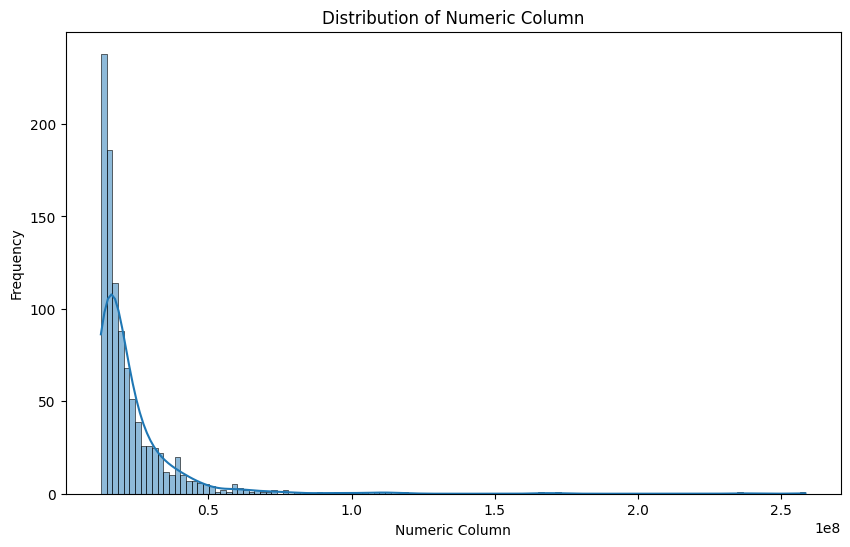

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Subscribers', kde=True)
plt.title('Distribution of Numeric Column')
plt.xlabel('Numeric Column')
plt.ylabel('Frequency')
plt.show()

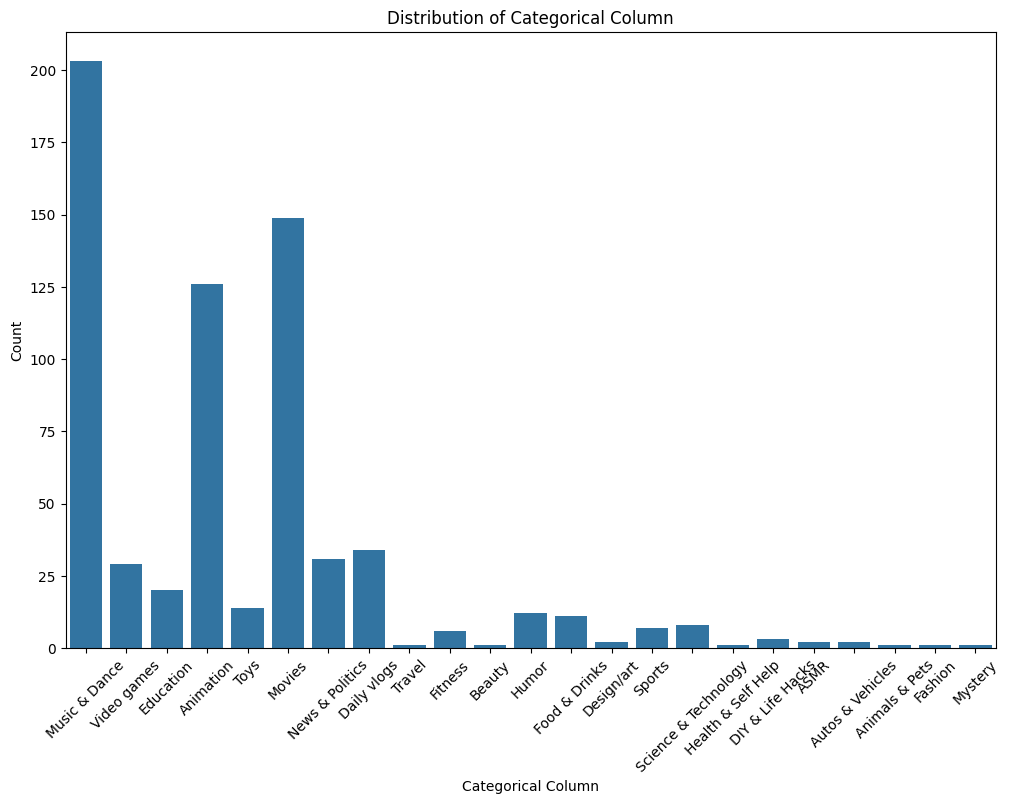

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Category')
plt.title('Distribution of Categorical Column')
plt.xlabel('Categorical Column')
plt.xticks(rotation=45)  # Helpful if labels are lengthy
plt.ylabel('Count')
plt.show()

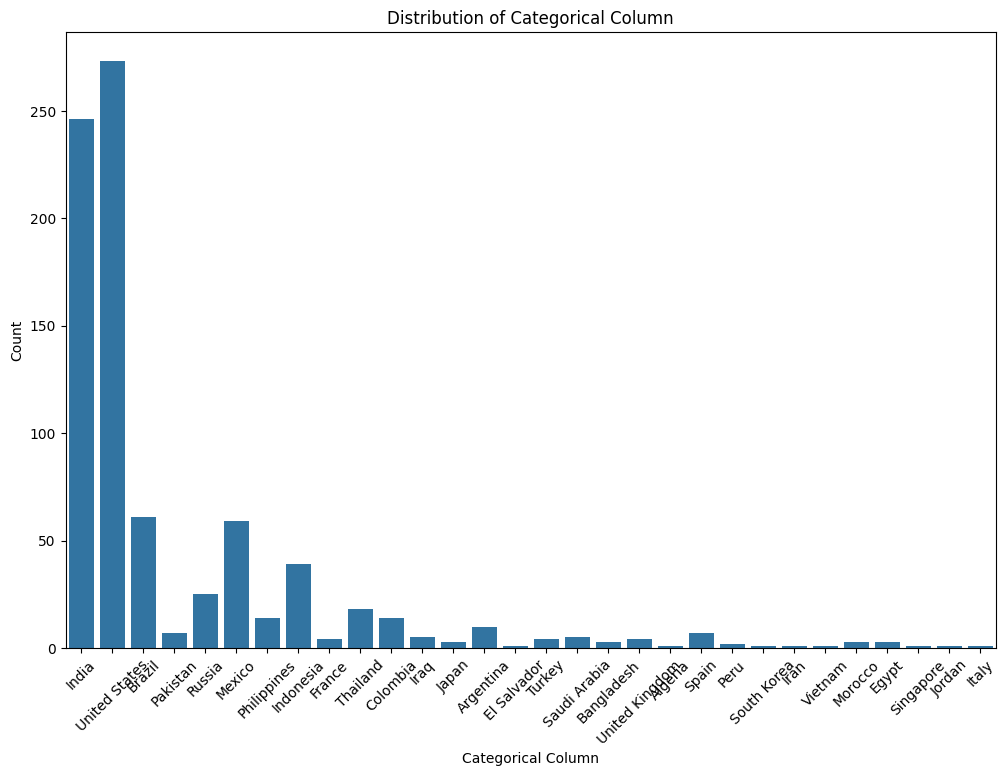

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Country')
plt.title('Distribution of Categorical Column')
plt.xlabel('Categorical Column')
plt.xticks(rotation=45)  # Helpful if labels are lengthy
plt.ylabel('Count')
plt.show()

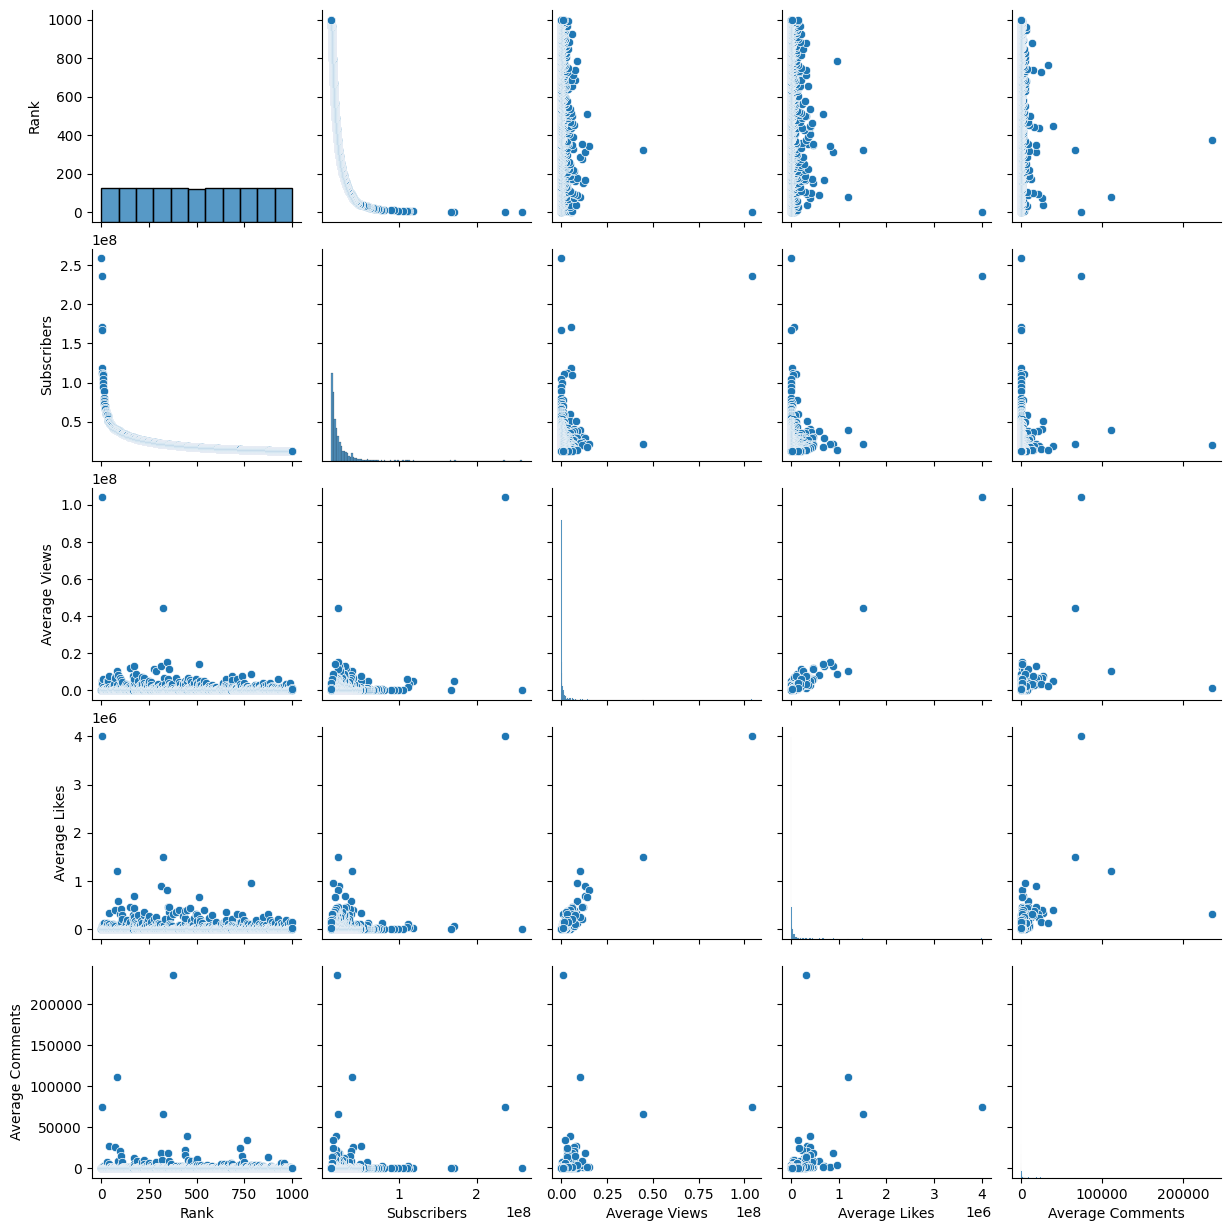

In [23]:
sns.pairplot(df)
plt.show()

## Task 2: Feature Engineering and Descriptive Statistics

##### Task 2.1

In [30]:
bins = [0, 20e6, 50e6, 100e6, 300e6]
labels = ['0-20M', '20-50M', '50-100M', '100M+']

df['Subscriber Ranges'] = pd.cut(df['Subscribers'], bins=bins, labels=labels, right=False)

df

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Subscriber Ranges
1,1.0,T-Series,Music & Dance,258400000.0,India,135200.0,5600.0,223.0,100M+
2,2.0,MrBeast,Video games,236100000.0,United States,104000000.0,4000000.0,74000.0,100M+
3,3.0,Cocomelon - Nursery Rhymes,Education,171400000.0,Unknown,5100000.0,57100.0,0.0,100M+
4,4.0,SET India,Unknown,167100000.0,India,27900.0,996.0,7.0,100M+
5,5.0,✿ Kids Diana Show,Animation,118500000.0,Unknown,5100000.0,14300.0,0.0,100M+
...,...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,Unknown,12500000.0,United States,80300.0,1700.0,79.0,0-20M
997,997.0,Jamie Nyland,Animation,12500000.0,United States,66700.0,2500.0,104.0,0-20M
998,998.0,janin al chair,Unknown,12500000.0,Mexico,1400000.0,146100.0,485.0,0-20M
999,999.0,Myke Towers,Music & Dance,12500000.0,Colombia,8300.0,485.0,8.0,0-20M


In [32]:
bins = [0, 10000,100000,200000,500000,5e6]
labels = ['0-10K', '10-100K','100-200K', '200-500K', '500K+']

df['Avg Likes Ranges'] = pd.cut(df['Average Likes'], bins=bins, labels=labels, right=False)

df

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Subscriber Ranges,Avg Likes Ranges
1,1.0,T-Series,Music & Dance,258400000.0,India,135200.0,5600.0,223.0,100M+,0-10K
2,2.0,MrBeast,Video games,236100000.0,United States,104000000.0,4000000.0,74000.0,100M+,500K+
3,3.0,Cocomelon - Nursery Rhymes,Education,171400000.0,Unknown,5100000.0,57100.0,0.0,100M+,10-100K
4,4.0,SET India,Unknown,167100000.0,India,27900.0,996.0,7.0,100M+,0-10K
5,5.0,✿ Kids Diana Show,Animation,118500000.0,Unknown,5100000.0,14300.0,0.0,100M+,10-100K
...,...,...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,Unknown,12500000.0,United States,80300.0,1700.0,79.0,0-20M,0-10K
997,997.0,Jamie Nyland,Animation,12500000.0,United States,66700.0,2500.0,104.0,0-20M,0-10K
998,998.0,janin al chair,Unknown,12500000.0,Mexico,1400000.0,146100.0,485.0,0-20M,100-200K
999,999.0,Myke Towers,Music & Dance,12500000.0,Colombia,8300.0,485.0,8.0,0-20M,0-10K


##### Task 2.2

Calculated mean, median and sd.

In [34]:
mean_for_subs = df['Subscribers'].mean()
mean_for_likes = df['Average Likes'].mean()

median_for_subs = df['Subscribers'].median()
median_for_likes = df['Average Likes'].median()

std_for_subs = df['Subscribers'].std()
std_for_likes = df['Average Likes'].std()

print(f"Mean of Subscribers: {mean_column1}")
print(f"Mean of Avg Likes: {mean_column2}")
print(f"Median of Subscribers: {median_column1}")
print(f"Median of Avg Likes: {median_column2}")
print(f"Standard Deviation of Subscribers: {std_column1}")
print(f"Standard Deviation of Avg Likes: {std_column2}")

Mean of Subscribers: 22904000.0
Mean of Avg Likes: 44284.905
Median of Subscribers: 17700000.0
Median of Avg Likes: 3800.0
Standard Deviation of Subscribers: 17702815.416584834
Standard Deviation of Avg Likes: 166125.31362707392


Count the frequency of each category.

In [36]:
non_float_columns = df.select_dtypes(exclude=['float64'])

for column in non_float_columns.columns:
    print(f"Counts of unique values in {column}:")
    print(df[column].value_counts())
    print("\n")

Counts of unique values in Channel Name:
Channel Name
Rosanna Pansino                           2
DeGoBooM                                  2
Linkin Park                               2
BigTasty                                  2
penguinz0                                 2
                                         ..
Dr. Vivek Bindra: Motivational Speaker    1
Baim Paula                                1
NBA                                       1
طارق الحلبي tarik alhalapi                1
HikakinTV                                 1
Name: count, Length: 994, dtype: int64


Counts of unique values in Category:
Category
Unknown                 335
Music & Dance           203
Movies                  149
Animation               126
Daily vlogs              34
News & Politics          31
Video games              29
Education                20
Toys                     14
Humor                    12
Food & Drinks            11
Science & Technology      8
Sports                    7
Fitness    

##### Task 2.3


In [ ]:
sns = 